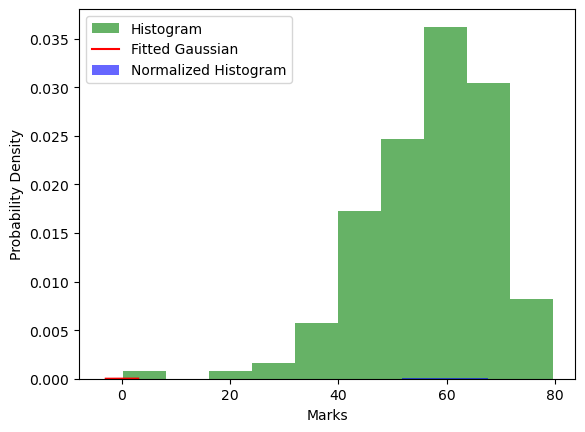

Estimated Mean: 54.581397025333175
Estimated Standard Deviation: 10.887011422971973


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit
import pandas as pd

# Sample data (replace with your own dataset)
df = pd.read_excel("marks.xlsx")  

# Create a histogram
hist, bins, _ = plt.hist(df, bins=10, density=True, alpha=0.6, color='g', label='Histogram')

# Calculate the total count of data points
total_count = len(df)

# Calculate the bin widths
bin_widths = np.diff(bins)

# Normalize the histogram by dividing bin counts by total count and bin width
normalized_hist = hist / (total_count * bin_widths)

# Plot the normalized histogram
plt.bar(bins[:-1], normalized_hist, width=bin_widths, alpha=0.6, color='b', label='Normalized Histogram')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
data1 = df.to_numpy()
data = data1.flatten()
def gaussian(x, mu , sigma , A):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

# Fit the data to the Gaussian distribution using curve_fit
mean_estimate = np.mean(data)
stddev_estimate = np.std(data)
# making the data zero mean and std=1
data = (data - mean_estimate)/stddev_estimate


#Normalize marks

amplitude_estimate = 1  # Initial estimate for the amplitude

params, covariance = curve_fit(gaussian, np.arange(len(data)), data, p0=[mean_estimate, stddev_estimate, amplitude_estimate],maxfev=100000)

# Extract the parameters of the fitted Gaussian
mu, sigma, A = params

# Generate the x values for the plot
x = np.linspace(-3, 3, 1000)

# Calculate the fitted Gaussian curve
fit = gaussian(x, mu, sigma, A)


plt.plot(x, fit, 'r-', label='Fitted Gaussian')

# Add labels and legend
plt.xlabel('Marks')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Print the estimated parameters of the Gaussian distribution
print("Estimated Mean:", mu)
print("Estimated Standard Deviation:", sigma)

